# SQL Project for Data Analysis

Unlock the insights hidden within your data to drive strategic decision-making and uncover new opportunities for growth. Explore how SQL analytics can transform your understanding of the restaurant industry and provide a competitive edge.


# **Business Problem Solving using SQL: A Data Analytics Project**

In the ever-evolving world of data, businesses rely on actionable insights to make informed decisions. This project delves into the power of SQL to unlock those insights! Here, we'll explore the art of data analysis and report making, leveraging SQL queries to extract valuable information and translate it into clear, concise reports.

This repository provides a comprehensive journey through the project, including:

- SQL Scripts: Meticulously crafted queries designed to unearth hidden trends and patterns within the data.
- Data Analysis: Insights derived from the data, presented in an easily digestible format.
- Report Making: Clear and concise reports that communicate findings effectively.

Get ready to embark on a data exploration adventure!


# About Yelp Dataset

Yelp is a web and mobile platform that functions as a crowd-sourced local business review site. Users can submit reviews, photos and tips about business, while also browsing information and ratings left by others.

# Agenda

- Problem Statement
- Research Objectives
- Hypothesis
- Data Overview
- Analysis and Findings
- Recommendation




**Let's we dive into it**

Installing and importing some usefull libraries during this project:

**Library sqlalchemy:** SQLAlchemy is a popular open-source Python library designed for working with SQL databases. It acts as both a SQL toolkit and an Object Relational Mapper (ORM).

Here's a breakdown of its key features:

SQL Toolkit:  SQLAlchemy provides a powerful suite of tools for interacting with relational databases. You can write raw SQL queries or use a Pythonic domain language to construct database operations.

Object Relational Mapper (ORM): An ORM simplifies working with databases by acting as a bridge between your Python objects and the relational database schema.  This allows you to interact with database tables using Python objects, reducing the need for writing raw SQL.

**Library matplotlib:** A comprehensive Python library for creating static, animated, and interactive visualizations.
- Strengths:
Wide variety of plot types (line, scatter, bar, histogram, 3D plots, etc.)
Customization options for plot elements (colors, lines, markers, labels, etc.)
Integration with other scientific libraries like NumPy and pandas
- Use Cases: 
Exploratory data analysis, creating publication-quality figures, data storytelling, interactive dashboards


**Library pandas:** A powerful library for data analysis and manipulation in Python.
- Strengths:
Data structures: DataFrames (tabular data) and Series (one-dimensional labeled arrays)
Loading data from various sources (CSV, Excel, SQL, JSON)
Data cleaning, transformation, and analysis tools
Time series functionality
- Use Cases:
Financial analysis, data cleaning, machine learning preprocessing, social science data analysis, scientific computing


**Library NumPy:** The foundation for scientific computing in Python.
- Strengths:
Efficient multidimensional arrays (ndarrays)
Linear algebra operations (matrix multiplication, vector math)
Integration with other scientific libraries
Broadcasting mechanism for efficient array operations
- Use Cases:
Numerical computations, scientific simulations, image processing, machine learning algorithms


**Library JSON (JavaScript Object Notation):** A lightweight, human-readable data interchange format.
- Strengths:
Simple syntax based on key-value pairs
Widely used for data exchange between web servers and applications
Supported by most programming languages
- Use Cases:
API data exchange, configuration files, storing and transmitting structured data

In [1]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
from sqlalchemy import create_engine

### DataBase Creation Code using pandas

One by One opening (Datasets) file using JSON. 



1. Function:
```read_json_to_df(file_path)```: This function reads a JSON file line by line and appends each line (which is a JSON object) to a list called ```data```. It uses the ```json.loads()``` function to parse each line into a Python dictionary.
If the length of ```data``` reaches 10,000 (you can adjust this number based on your memory constraints), it converts data into a pandas DataFrame and yields it. This is a way of creating a generator that can handle large files by only loading a certain number of lines into memory at a time.

After yielding the DataFrame, it resets ```data``` to an empty list and continues the process until all lines in the file have been read. If there are any remaining lines that haven’t been yielded when the file reading is complete, it yields those as well.

2. List ```file_paths```: 
This is a list of file paths for the JSON files you want to read. In this case, it looks like it’s set up to read a set of files from a Kaggle dataset about Yelp.

3. Dictionary Comprehension ```dfs```: 
This is where the ```read_json_to_df()``` function is actually called. For each file path in ```file_paths```, it calls ```read_json_to_df(file_path)``` and concatenates all the yielded DataFrames into one DataFrame using ```pd.concat()```. The ```ignore_index=True``` argument means that the index from each individual DataFrame is ignored and a new index is created for the concatenated DataFrame.

The resulting DataFrame is then stored in a dictionary called ```dfs```, where the key is the name of the file (extracted by splitting the file path on ‘/’ and ‘.’), and the value is the DataFrame.
So, in summary, this code reads multiple large JSON files from the specified paths, converts each file into a DataFrame, and stores all the DataFrames in a dictionary. This is a memory-efficient way to handle large datasets.

In [4]:
def read_json_to_df(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
            if len(data) >= 10000:  # Adjust this value based on your memory constraint
                yield pd.DataFrame(data)
                data = []
    yield pd.DataFrame(data)

file_paths = [
    '/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json',
    '/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json',
    '/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json',
    '/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json',
    '/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json'
]

dfs = {file_path.split('/')[-1].split('.')[0]: pd.concat(read_json_to_df(file_path), ignore_index=True) for file_path in file_paths}

In [5]:
# Printing loaded DataFrames
for name, df in dfs.items():
    print(f"The shape of {name} DataFrame is: {df.shape}")


The shape of yelp_academic_dataset_business DataFrame is: (150346, 14)
The shape of yelp_academic_dataset_checkin DataFrame is: (131930, 2)
The shape of yelp_academic_dataset_review DataFrame is: (6990280, 9)
The shape of yelp_academic_dataset_tip DataFrame is: (908915, 5)
The shape of yelp_academic_dataset_user DataFrame is: (1987897, 22)


In [6]:
# Removing Two Un-wanted Columns from DataFrams Which were stored in business_df variable.

business_df = dfs['yelp_academic_dataset_business']

if 'attributes' in business_df.columns and 'hours' in business_df.columns:
  # Drop columns if they exist
  business_df.drop(['attributes', 'hours'], axis=1, inplace=True)
  print('Columns dropped successfully!')
else:
  # Print message if columns are not found
  print('Columns "attributes" and/or "hours" not found in DataFrame.')



Columns dropped successfully!


1. ```create_engine('sqlite:///yelp.db')```: 
This line creates a SQLAlchemy Engine that will interact with the SQLite database ```yelp.db```. The Engine is a starting point for any SQLAlchemy application. It’s “home base” for the actual database and its DBAPI, delivered to the SQLAlchemy application through a connection pool and a Dialect, which describes how to talk to a specific kind of database/DBAPI combination.
2. Function ```load_dataframe(df, table_name, engine)```: 
This function takes a DataFrame ```df```, a ```table_name``` string, and a SQLAlchemy ```engine``` as input. It uses the ```to_sql()``` function of the DataFrame to load the DataFrame into a SQL database. The ```con``` parameter is the SQLAlchemy engine, ```if_exists = 'replace'``` means that if a table with the same name already exists in the database, it will be replaced with the new data. ```index = False``` means that the DataFrame index will not be written to the table.
3. DataFrame Extraction: 
The ```dfs``` dictionary (created in the previous code you shared) contains DataFrames loaded from JSON files. This code extracts each DataFrame from the dictionary and assigns it to a variable.
4. Loading DataFrames into Database:
The ```load_dataframe()``` function is called for each DataFrame, with the DataFrame, the desired table name, and the SQLAlchemy engine as arguments. This loads each DataFrame into a separate table in the SQLite database.
5. Print Statement: 
Once all the DataFrames have been loaded into the database, a message is printed to indicate that the operation was successful.

So, in summary, this code takes a set of pandas DataFrames, each containing data from a different Yelp dataset, and loads each DataFrame into a separate table in a SQLite database. This is a common way to store large datasets for further analysis.

In [7]:
engine = create_engine('sqlite:///yelp.db')

def load_dataframe(df, table_name, engine):
    df.to_sql(table_name, con = engine, if_exists = 'replace', index = False)
    
business_DF = dfs['yelp_academic_dataset_business']
checkin_DF = dfs['yelp_academic_dataset_checkin']
review_DF = dfs['yelp_academic_dataset_review']
tip_DF = dfs['yelp_academic_dataset_tip']
user_DF = dfs['yelp_academic_dataset_user']


# Load each Dataframe into a separate table
load_dataframe(business_DF, 'business', engine)
load_dataframe(checkin_DF, 'checkin', engine)
load_dataframe(review_DF, 'review', engine)
load_dataframe(tip_DF, 'tip', engine)
load_dataframe(user_DF, 'user', engine)

print('Loaded each Dataframe into a separate table')


Loaded each Dataframe into a separate table


## Problem Statement

**In a competitive market like the restaurant industry, understanding the factors that influence business success is crucial for stakeholders. Utlizing the Yelp dataset, this project aims to investigate the relationship between user engagement ( reviews, tips, and check-ins ) and business success metrices ( review count, ratings ) for restaurant.**

## Reseach Objectives

1. **Quantify the correlation between user engagement (reviews, tips, check-ins) and review count/average star rating:** This will help us determine if the restaurants with higher user engagement experience a corresponding increases in reviews and ratings.

2. **Analyze the impact of sentiment on review count and average star ratings:** We will investigate if positive sentiment in reviews and tips translates to higher star ratings and potentially influences the total number of reviews left.

3. **Time trends in User engagement:** We will explore if consistent user engagement over time is a stronger indicator of long-term success compared to sporadic bursts of activity.


## Hypothesis Testing

- Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants.
- Positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants.
- Consistent engagement over time is positively associated with sustained business success for restaurants.

### **Importing Librabries:** 
That are helpful in analysis and Visualize the data.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import numpy as np
import sqlite3
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Creating a Database Connection
# Make sure that database in same folder
con = sqlite3.connect('yelp.db')

In [10]:
# We have taken a "table" name variable to store all tables from database, to get to know that how much table present in DB

# This SQL query, SELECT name from sqlite_master where type = 'table', is used to retrieve the names of all tables within a SQLite database. Here's a breakdown of its components:

tables = pd.read_sql_query("SELECT name from sqlite_master where type = 'table'", con)

In [11]:
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [12]:
# Explore What type of data available in the tables

# For that we iterate in tables using for-loop

for table in tables['name']: # Column Name is nessecary to mentioned to retive
    display(pd.read_sql_query(f"SELECT * FROM {table} limit 5", con))  # We can't fetch whole table, due to large dataset we only fetch some sample to get to know which data availabe inside table
    

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


### Data Analysis

Will filter out this things given below: 

- First we found that how many business are there.
- Secondly we found how many related to restaurants business are there.
- Third we work only on open restaurant business only ( is_open ).

In [13]:
print("Count of Uniques Business are in table")
pd.read_sql_query("SELECT COUNT(*) FROM BUSINESS", con)

Count of Uniques Business are in table


,COUNT(*)
0,150346


In [14]:
# Now we are finding that how much Restaurant business are there and open business
business_id = pd.read_sql_query("""SELECT business_id, review_count FROM business WHERE lower(categories) like '%restaurant%' and is_open = 1""", con) 
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [15]:
business_id.shape

(35004, 2)

### Problem Statement:

Now Problem statement focuses on business score, So by analyzing review count and rating we get business score.

What is the descriptive stats for for review count and star rating for business?

- First we check Distribution of Data
- Average, Minimum, Maximum, Median value from this we get complete information of Distribution value.


In [16]:
# Pandas doesn't support directly Nested Queries 

# Alternate way is to execute sub-Query First

# Find median using a separate query
median_query = f"""
SELECT review_count
FROM business
ORDER BY review_count
LIMIT 1
OFFSET (SELECT count(*) FROM business) / 2
"""

median_review_count = pd.read_sql_query(median_query, con)["review_count"].tolist()[0]

# Main query with median value
main_query = f"""
SELECT avg(review_count), min(review_count), max(review_count) as max_review_count,
{median_review_count} as median_review_count
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
"""

df = pd.read_sql_query(main_query, con)

# Printing Value of Query as a Result
df

,avg(review_count),min(review_count),max_review_count,median_review_count
0,104.097789,5,7568,15


We can see that column max_review_count ( 7568 ) have outliner value in distribution.
Now this outliner affects our Normal Analysis, so we remove outliner from the table,
For that we create a function because sometime we need outliner and sometime don't.

In [17]:
# What is the descriptive stats for reviewcount and star rating for business?
# avg, min, max, median

pd.read_sql_query(f"""SELECT
AVG(review_count) AS average_review_count,
MIN(review_count) AS min_review_count,
MAX(review_count) AS max_review_count,
(SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,

AVG(stars) AS avg_star_count,
MIN(stars) AS min_star_count,
MAX(stars) AS max_star_count,
(SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating

FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
""", con).transpose()

,0
average_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
avg_star_count,3.523969
min_star_count,1.000000
max_star_count,5.000000
median_star_rating,3.500000


**Quartile Range:** we find, before we have one look on it.

**1. Quantiles:** 
In statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When the data is sorted in ascending order:
- First Quantile (Q1), also known as the 25th percentile or lower quartile, is the value below which 25% of the observations lie.
- Second Quantile (Q2), also known as the 50th percentile or median, is the value below which 50% of the observations lie. It effectively divides the data set into two halves.
- Third Quantile (Q3), also known as the 75th percentile or upper quartile, is the value below which 75% of the observations lie.
**2. Interquartile Range (IQR):** The IQR is a measure of statistical dispersion and is calculated as the difference between the upper and lower quartiles (Q3 - Q1). It is used to measure variability by dividing a data set into quartiles. In other words, the IQR is the range within which the central 50% of the data falls.

Here’s a simple way to visualize these concepts:

|-----------------|-----------------|-----------------|-----------------|

|Min----------|Q1 (25%)----------|Median (50%)----------|Q3 (75%)----------|Max----------|



Quartile 1 and Quartile 3 in-between Data are called as Inter-Quartile Range.
First we find Lower Bound and Upper Bound after than we find Inter-Quartile.

In [18]:
def remove_outliers(df, col):
  """
  This function identifies outliers in a column of a pandas DataFrame using IQR method 
  and returns a new DataFrame containing only in-range values.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column to analyze.
      col (str): The name of the column to identify outliers in.

  Returns:
      pandas.DataFrame: A new DataFrame excluding outliers based on IQR method.
  """
  df_copy = df.copy()  # Create a copy to avoid modifying original data
  quantile_1 = df_copy[col].quantile(0.25)
  quantile_3 = df_copy[col].quantile(0.75)
  inter_quartile_range = quantile_3 - quantile_1
  lower_bound = quantile_1 - (1.5 * inter_quartile_range)
  upper_bound = quantile_3 + (1.5 * inter_quartile_range)
  # Filter for in-range values (excluding outliers)
  filtered_df = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]
  return filtered_df


Let's we check-it this function on business_id

This ```business_id``` variable contains, queries a table named ```business``` from a SQL database and retrieves the ```business_id``` and ```review_count``` for businesses that have ```"restaurant"``` (case-insensitive) in their categories and are currently open (based on the is_open flag). The result is stored in a ```business_id``` variable which can be further analyzed or manipulated using pandas functions.

In [19]:
business_id_filtered_df = remove_outliers(business_id, 'review_count')

In [20]:
print("business_id Original Value: ", business_id.shape)   #Original Value
Original_Business_id_value = business_id.copy()
print("Original_business_id_value Original Value: ", Original_Business_id_value.shape)

business_id = None
business_id = business_id_filtered_df.copy()
print("business_id Filtered Value: ", business_id.shape)

business_id Original Value:  (35004, 2)
Original_business_id_value Original Value:  (35004, 2)
business_id Filtered Value:  (31537, 2)


### Q. What is the descriptive stats for reviewcount and star rating for business?

In [21]:
# What is the descriptive stats for reviewcount and star rating for business?
# avg, min, max, median

pd.read_sql_query(f"""SELECT
AVG(review_count) AS average_review_count,
MIN(review_count) AS min_review_count,
MAX(review_count) AS max_review_count,
(SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,

AVG(stars) AS avg_star_count,
MIN(stars) AS min_star_count,
MAX(stars) AS max_star_count,
(SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating

FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
""", con).transpose()



,0
average_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
avg_star_count,3.477281
min_star_count,1.000000
max_star_count,5.000000
median_star_rating,3.500000


Now we look at on that business contains most review counts and ratings and in-between is their any co-relation.


Which Restaurants have highest number of reviews?

### Q. Which Restaurants have highest number of reviews?

In [22]:
# For that we write a query to fetch data
# We will work business name instead of buiness id 

print("Top 10 Review Count\n\n")

pd.read_sql_query(f"""SELECT name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
WHERE business_id in {tuple(business_id['business_id'])}
group by name
order by review_count desc
limit 10""", con)

Top 10 Review Count




,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


### Q. Which Restaurants have highest number of ratings?

In [23]:
print("Top 10 Highest Count\n\n Highest Rating\n")

pd.read_sql_query(f"""SELECT name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
WHERE business_id in {tuple(business_id['business_id'])}
group by name
order by avg_rating desc
limit 10""", con)

Top 10 Highest Count

 Highest Rating



,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


Many business have review count is better than ratings and many have vice-versa, So we prefer business on basis that have both better and find best score.

### Do restaurants have higher engagement tend to higher ratings?

In [24]:
pd.read_sql_query("""SELECT business_id,
sum(length(date) - length(replace(date,',',''))+1) as checkin_count
from checkin
group by business_id
""", con)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [25]:
pd.read_sql_query("""SELECT business_id, count(*) as tip_count
from tip
group by business_id
""", con)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [26]:
review_count_df = pd.read_sql_query(f"""SELECT total.avg_rating as rating,
AVG(total.review_count) as avg_review_count,
AVG(total.checkin_count) as avg_checkin_count,
AVG(total.tip_count) as avg_tip_count
FROM
(SELECT
    b.business_id,
    SUM(b.review_count) as review_count,
    AVG(b.stars) as avg_rating,
    SUM(length(cc.date) - length(replace(cc.date, ',','')) + 1 ) as checkin_count,
    SUM(tip.tip_count) as tip_count
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id) as total
    
GROUP BY total.avg_rating

""", con)

print(review_count_df)

   rating  avg_review_count  avg_checkin_count  avg_tip_count
0     1.0         14.365079          17.518072       2.781513
1     1.5         24.358459          34.480969       3.884654
2     2.0         27.759629          52.386515       4.581058
3     2.5         36.631037          79.349429       6.325225
4     3.0         48.054998         105.970405       8.301950
5     3.5         63.730125         125.781702      10.320786
6     4.0         73.136954         127.139075      11.329362
7     4.5         65.282554          86.177605       8.995201
8     5.0         31.127979          27.545113       4.269082


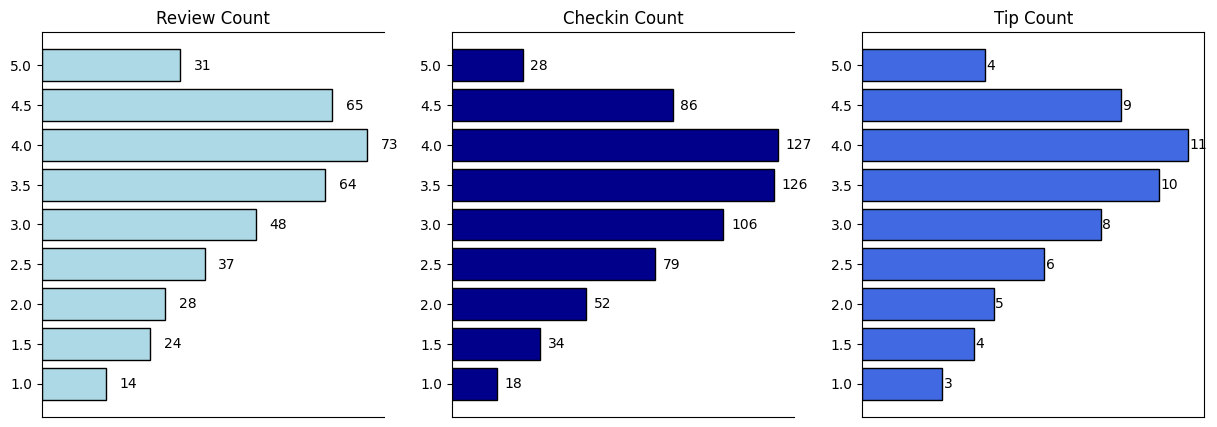

In [27]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor = 'k', color = '#ADD8E6')
plt.gca().spines['right'].set_visible(False)

for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value + 3, i, str(round(value)), color = 'black', va = 'center')


    
plt.xticks([])
plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#00008B')
plt.gca().spines['right'].set_visible(False)

for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value + 3, i, str(round(value)), color = 'black', va = 'center')
    
    
    
    
plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor = 'k', color = '#4169E1')
# plt.gca().spines['right'].set_visible(False)

for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value + 0.05, i, str(round(value)), color = 'black', va = 'center')
plt.xticks([])
plt.show()


### Q. Is there any correlation between the number of reviews, tips and check-ins for a business?

In [28]:
engagement_df = pd.read_sql_query(f"""SELECT
    b.business_id,
    SUM(b.review_count) as review_count,
    AVG(b.stars) as avg_rating,
    SUM(length(cc.date) - length(replace(cc.date, ',','')) + 1 ) as checkin_count,
    SUM(tip.tip_count) as tip_count,
    (CASE WHEN b.stars >= 3.5 Then 'High-Rated' Else 'Low_Rated' End) as category
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id
""", con).dropna()

print(engagement_df)

                  business_id  review_count  avg_rating  checkin_count  \
0      ---kPU91CF4Lq2-WlRu9Lw            24         4.5           11.0   
1      --0iUa4sNDFiZFrAdIWhZQ            14         3.0           10.0   
2      --epgcb7xHGuJ-4PUeSLAw            34         3.0          118.0   
4      --lqIzK-ZVTtgwiQM63XgQ            15         2.0           21.0   
5      -09Oc2D14vRnmirPh0vlXw           135         3.0          500.0   
...                       ...           ...         ...            ...   
31530  zzIF9qp2UoHN48EeZH_IDg            19         3.0            6.0   
31532  zzbZtgPYZS8sTIWQH6DwEw            86         3.0          292.0   
31533  zziDpuuJw-Km1J4BaGpBKA             6         3.5           20.0   
31534  zzjFdJwXuxBOGe9JeY_EMw            47         4.0           27.0   
31535  zznJox6-nmXlGYNWgTDwQQ            30         1.5           67.0   

       tip_count    category  
0            4.0  High-Rated  
1            6.0   Low_Rated  
2            6.0  

In [29]:
print("Correlation find")
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

Correlation find


,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

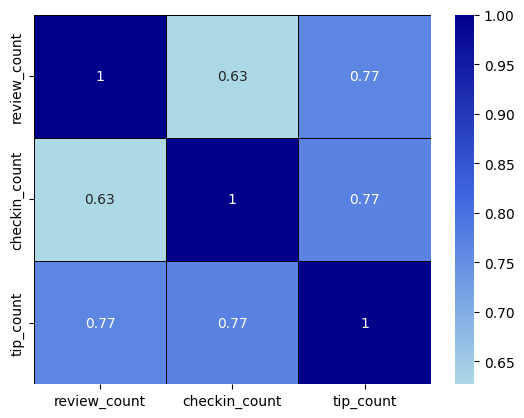

In [30]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['#ADD8E6', '#4169E1', '#00008B']
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)
sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap = custom_cmap, annot = True, linewidths = 0.4, linecolor = 'black')


### Q. Is there any difference in the user engagement (review, tips, and check-ins) between high-rated and low-rated business?

In [31]:
engagement_df.groupby('category')[['review_count', 'tip_count', 'checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-Rated,72.291062,10.162766,122.066641
Low_Rated,42.123420,6.541689,88.880828


### Next analysis we do on based success score for that we create one function, based on ratings and review count.

In [32]:
#  Function to calculate the success score based on the avg rating and total review count

def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

print("Compile Function")

Compile Function


### Q. How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities.

In [33]:
city_df = pd.read_sql_query(f"""SELECT city, state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count) as review_count,
count(*) as restaurant_count
from business
WHERE business_id IN {tuple(business_id['business_id'])}
group by state, city
order by review_count desc
limit 10
""", con)

# Now we will find business score then according to it we plot in to it
city_df['success_score'] = calculate_success_metric(city_df)

In [34]:
# Printing Succes Score 
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [35]:
# create a base map

m = folium.Map(location = [city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start = 4)

# Define a color scale

color_scale = folium.LinearColormap(colors = ['green', 'yellow', '#E54F29'],
                                    vmin = city_df['success_score'].min(),
                                    vmax = city_df['success_score'].max())

# Add markets to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
    location = [row['latitude'], row['longitude']],
    radius = 5,
    color = color_scale(row['success_score']),
    fill = True,
    fill_color = color_scale(row['success_score']),
    fill_opacity = 0.7,
    popup = f"Success Score: {row['success_score']}"
    ).add_to(m)
    
    
# Add color scale to the map
m.add_child(color_scale)

### Q. Now we find Are there any patterns in user engagements over time for successful businesses compared to less successful ones?

### Q. Are there any seasonal trends in the user engagement for restaurants?

In [36]:
high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
""", con)

print("High_rated Done")

low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
""", con)

print("Done")

High_rated Done
Done


In [37]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [38]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [39]:
time_rating = pd.read_sql_query(f"""SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""", con)

In [40]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [41]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace = True)
time_rating = time_rating[time_rating['month_year'] > '2017']


high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2017']


low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > '2017']



In [42]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

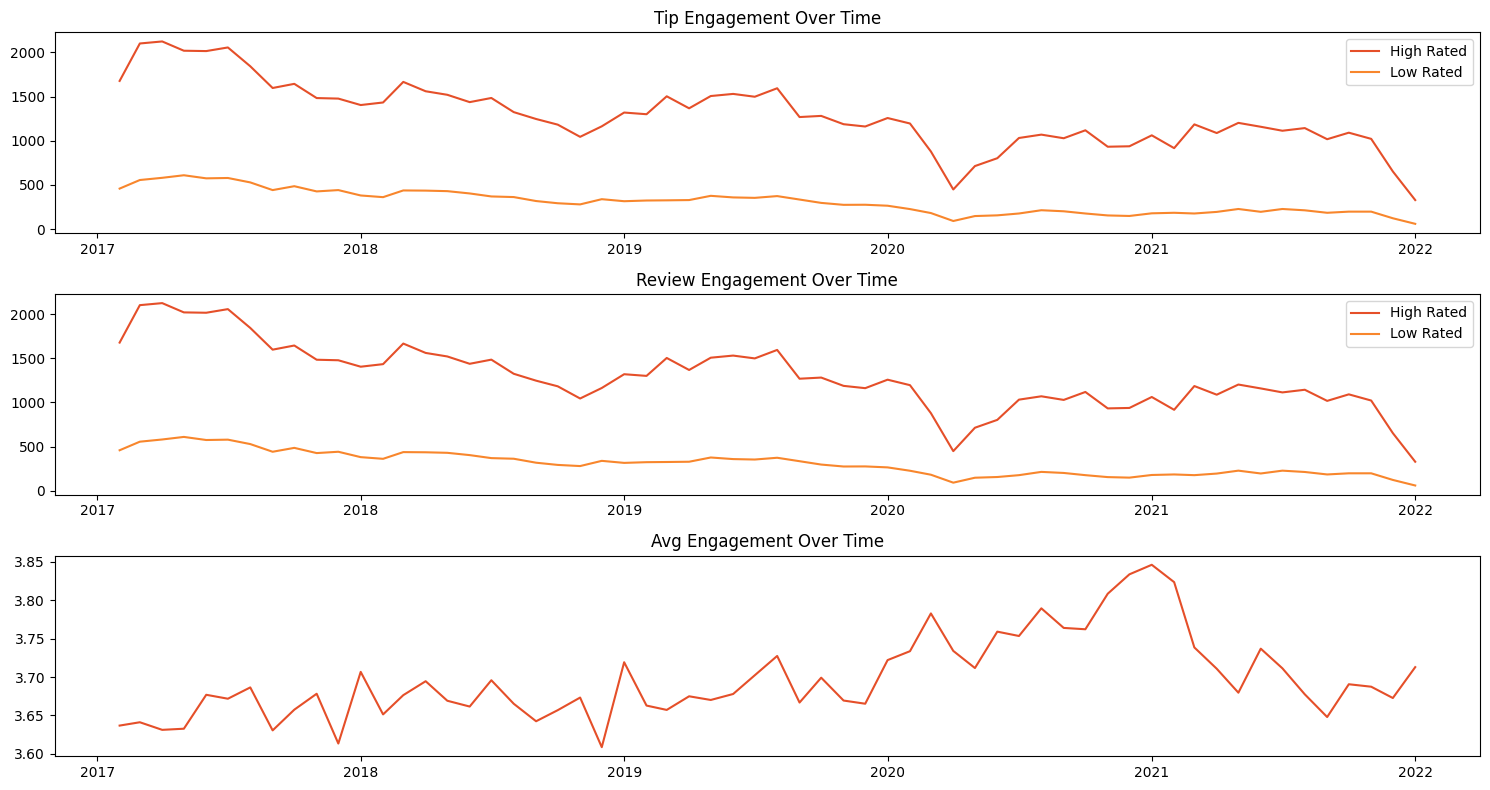

In [43]:
plt.figure(figsize = (15, 8))
plt.subplot(3, 1, 1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()


plt.subplot(3, 1, 2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()


plt.subplot(3, 1, 3)
plt.title('Avg Engagement Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()


In [44]:
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')
rating_df = high_rated_engagement[['month_year', 'avg_rating']].set_index('month_year')

<function matplotlib.pyplot.show(close=None, block=None)>

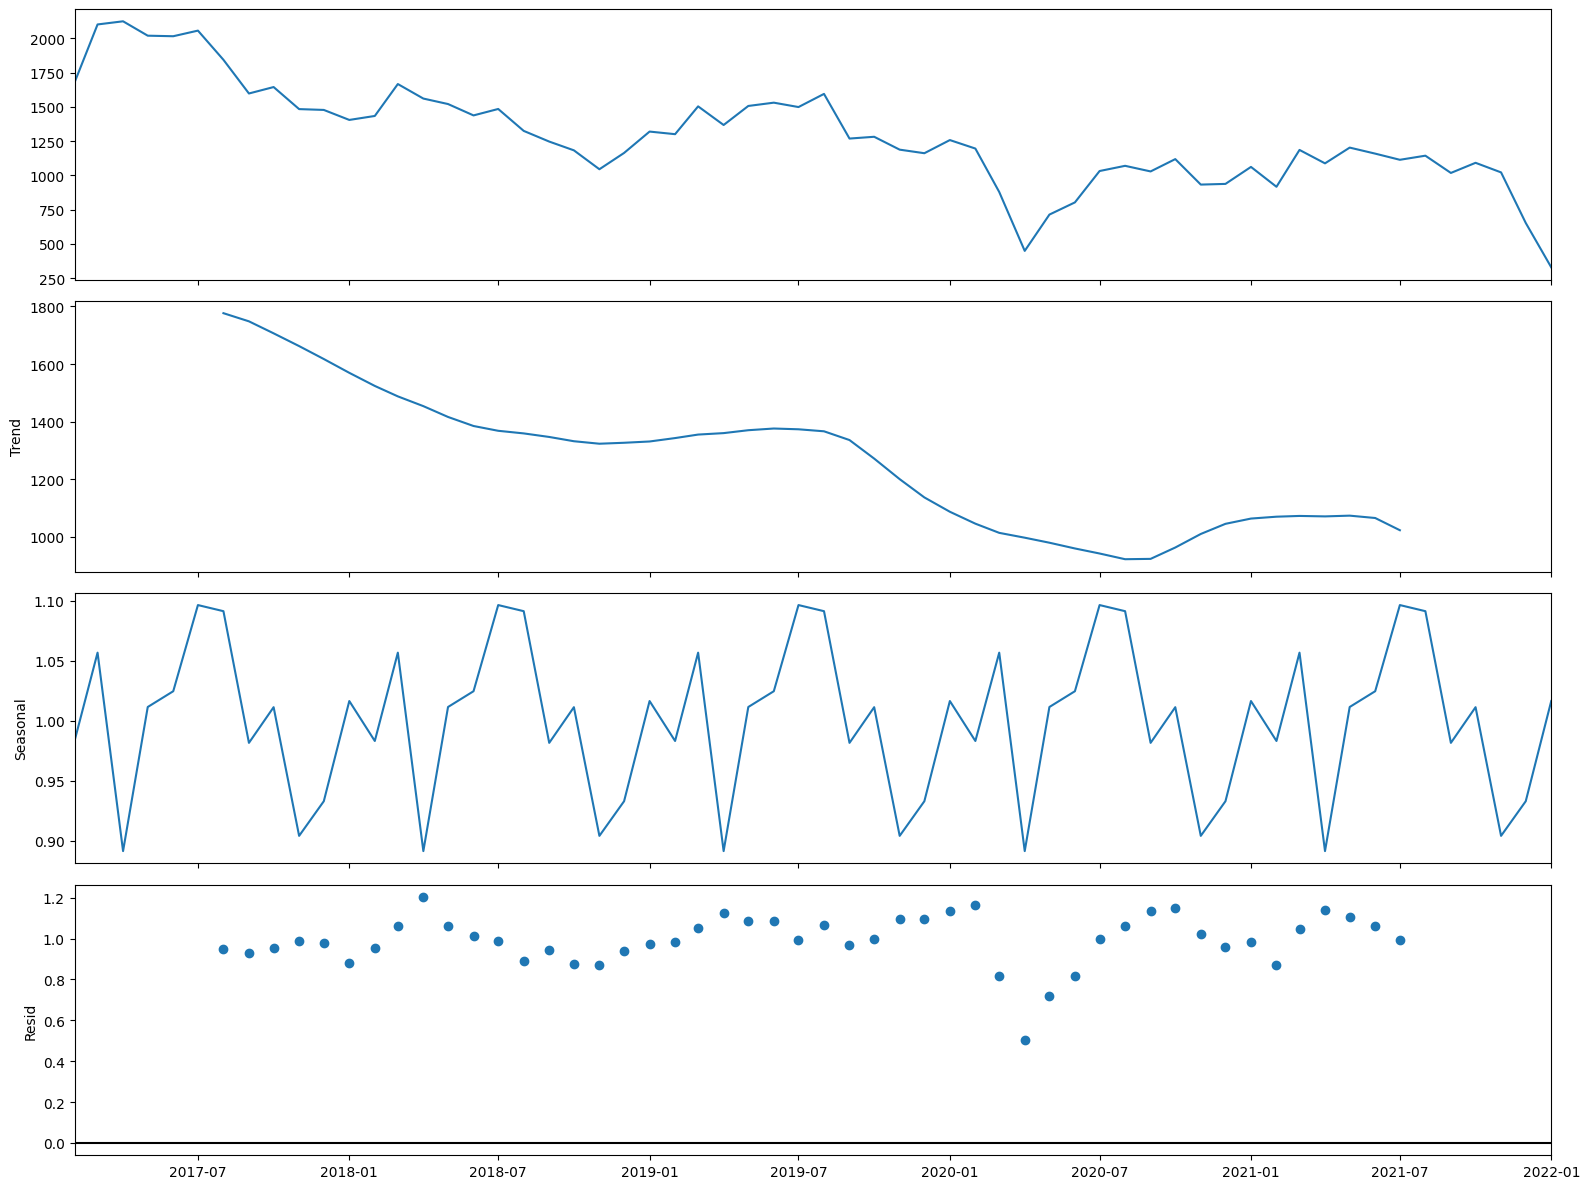

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Tip High Rated
multiplicative_decomposition = seasonal_decompose(tip_high_rated, model = 'multiplixative', period = 12)
plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

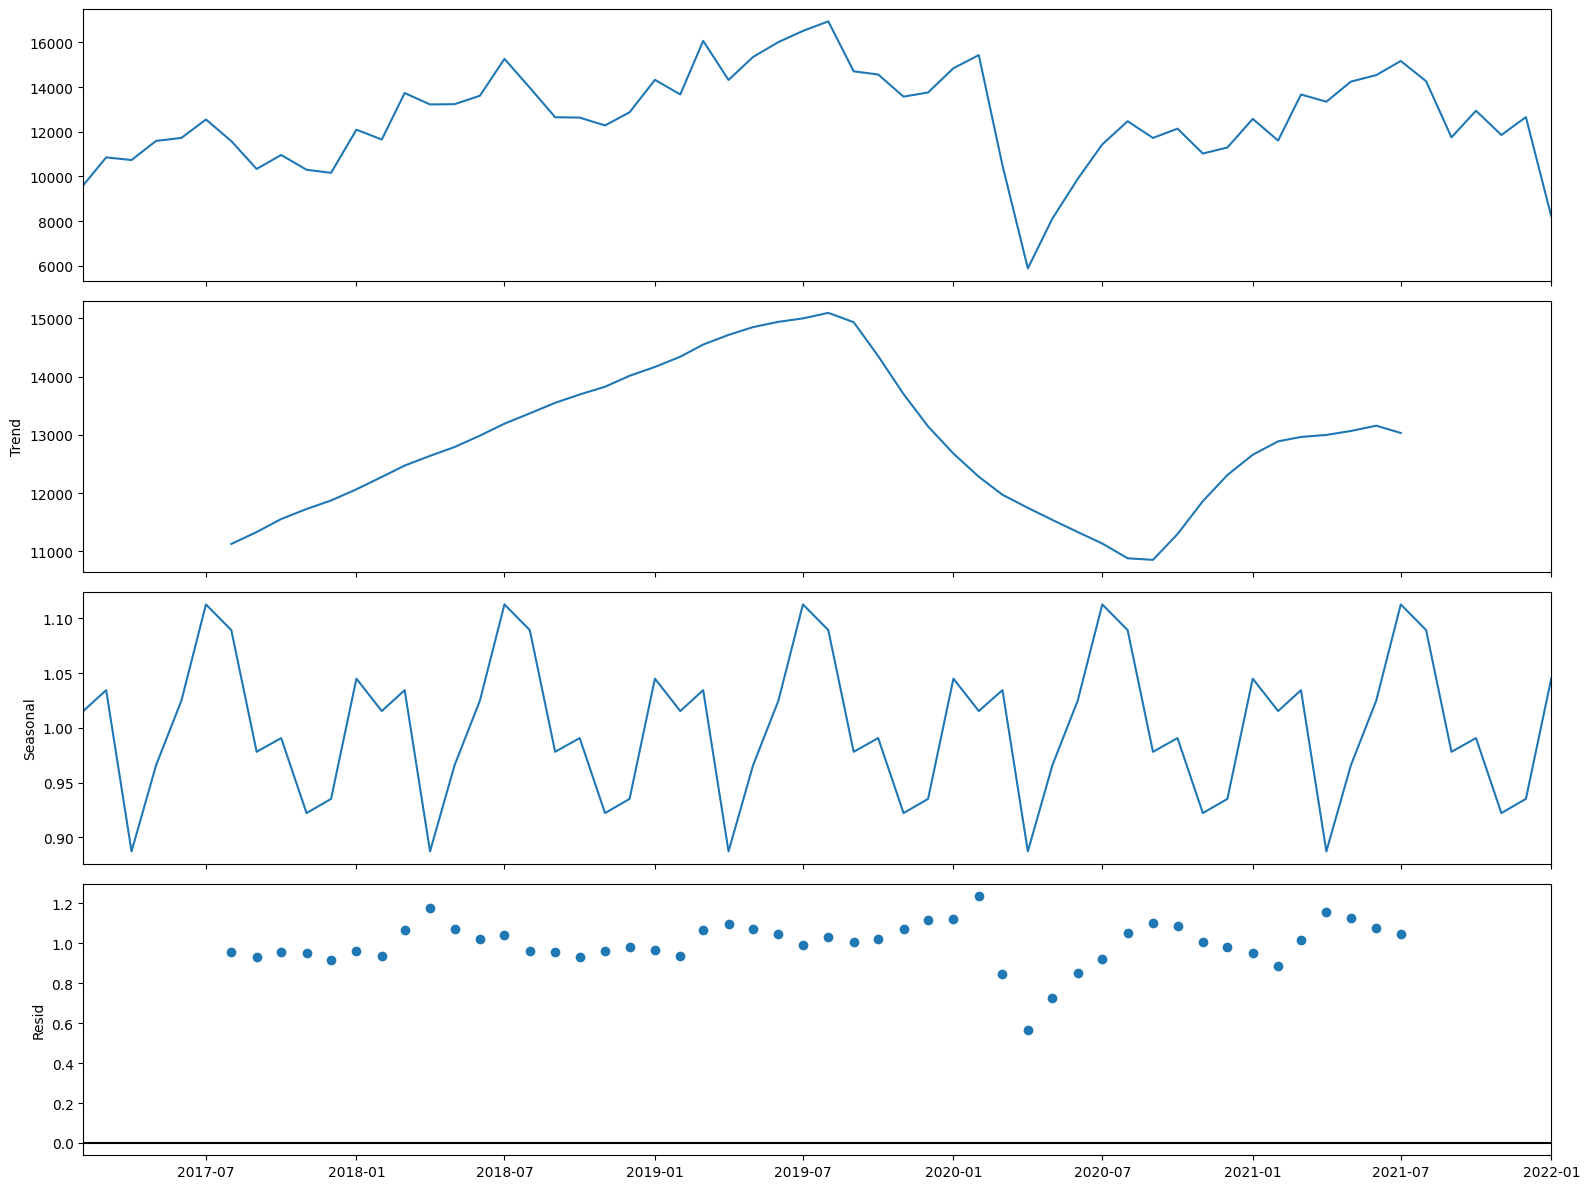

In [46]:
# Review Count

multiplicative_decomposition = seasonal_decompose(review_high_rated, model = 'multiplixative', period = 12)
plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot()
plt.show

### Q. How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?

In [47]:
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
    SUM(useful) as useful_count,
    SUM(funny) as funny_count,
    SUM(cool) as cool_count
FROM
    review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count""", con)

sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

In [48]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

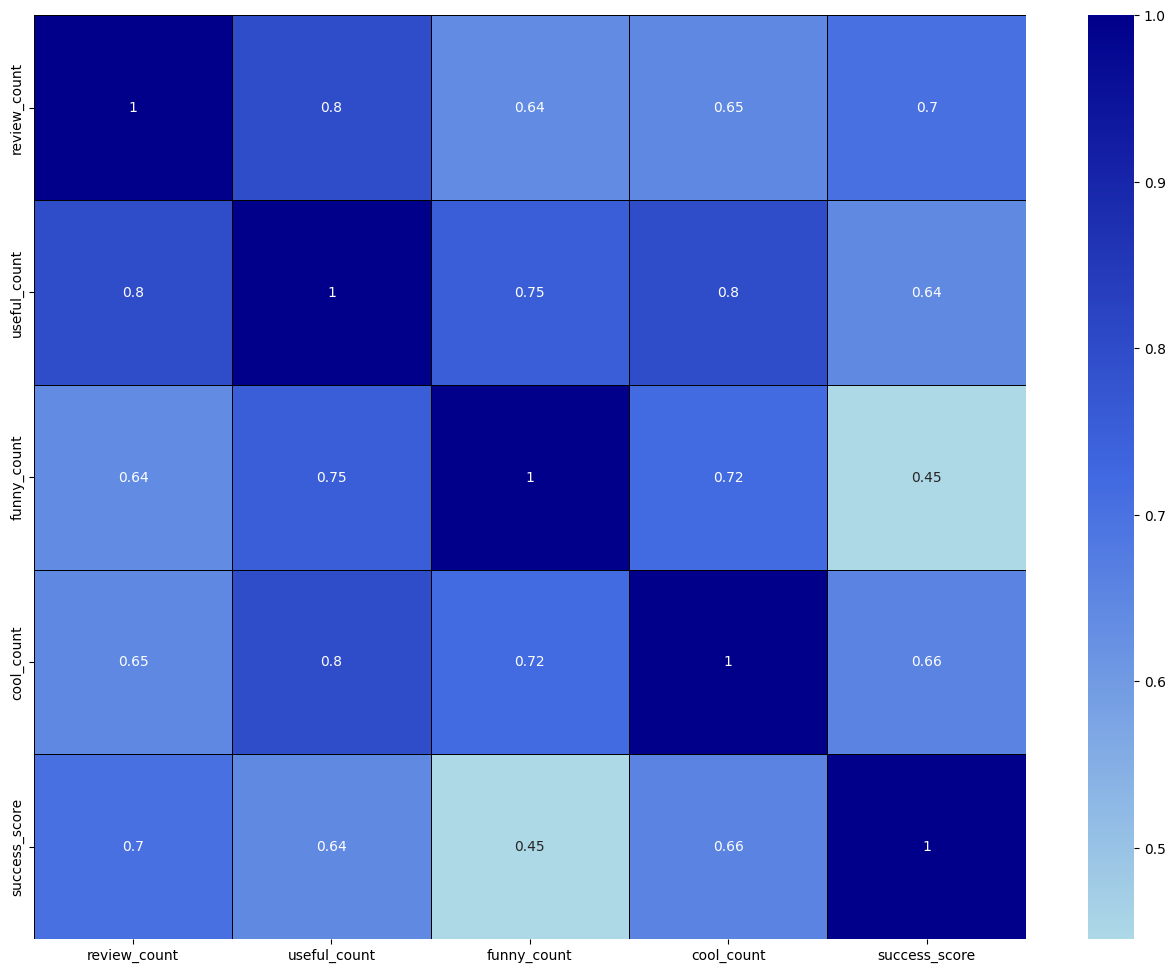

In [49]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidths = 0.5, linecolor = 'black')
plt.show()

### Q. Is there any differences in engagement of elite users and non-elite users?

In [50]:
elite_df = pd.read_sql_query("""SELECT
elite,
COUNT(*) as row_count,
SUM(review_count) as total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END as elite,
        u.review_count
    FROM
        user u) as user_elite
GROUP BY
    elite;
""", con)

In [51]:
elite_df

,elite,row_count,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


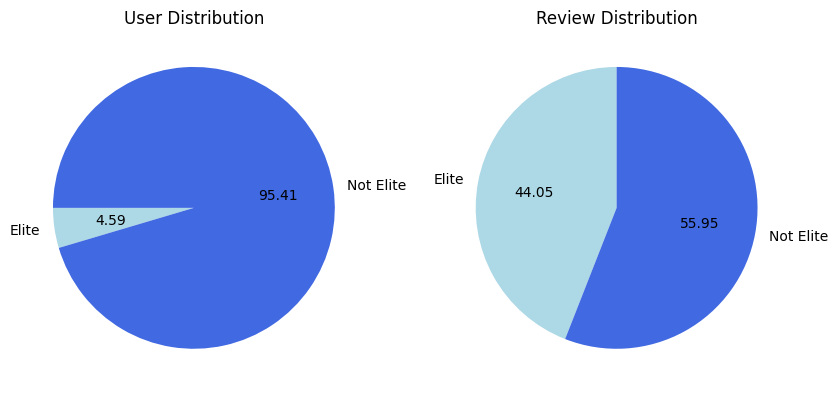

In [52]:
# colors = ['#ADD8E6', '#4169E1', '#00008B']

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'], labels = elite_df['elite'], autopct = '%.2f', startangle = 180, colors = ['#ADD8E6', '#4169E1'])

plt.subplot(1, 2, 2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct = '%.2f', startangle = 90, colors = ['#ADD8E6', '#4169E1'])

plt.show()

### Q. What are the busiest hours for restaurant?

In [53]:
review_engagement = pd.read_sql_query("""SELECT
cast (strftime('%H', date) as integer)
as hour,
COUNT(*) as review_count
FROM
    review
GROUP BY
    hour;
""", con)

tip_engagement = pd.read_sql_query("""SELECT
cast (strftime('%H', date) as integer)
as hour,
COUNT(*) as tip_count
FROM
    tip
GROUP BY
    hour;
""", con)

checkin = pd.read_sql_query("""SELECT date FROM checkin""", con)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime('%H') for j in i.split(',')])
checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

print('Done')

Done


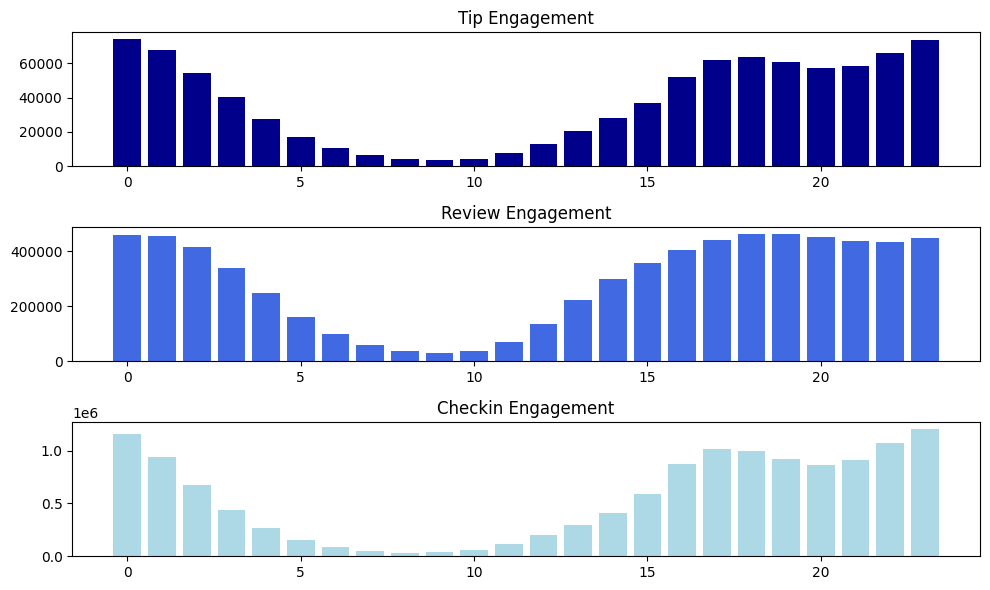

In [54]:
plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color = '#00008B')


plt.subplot(3, 1, 2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color = '#4169E1')


plt.subplot(3, 1, 3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color = '#ADD8E6')

plt.tight_layout()
plt.show()